# Домашнее задание по кластеризации

Сегментация клиентов — это разделение рынка на отдельные группы клиентов со схожими характеристиками. Сегментация клиентов может быть мощным средством выявления неудовлетворенных потребностей клиентов. Используя вышеуказанные данные, компании могут превзойти конкурентов, разработав уникальные привлекательные продукты и услуги.

Вы владеете супермаркетом и с помощью членских карт у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов.

Вы хотите понять клиентов, например, кто является целевыми клиентами, чтобы это можно было передать маркетинговой команде и соответствующим образом спланировать стратегию.

Для этого вам нужно разбить клиентов на различные группы по похожести.

## Задания

### Задание 1.

Провести исследование данных с визуализацией:
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Age` и `Income`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `Sex`.
5. Построить матрицу корреляции для всех переменных.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import pandas as pd 


In [27]:
data = 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
df = pd.read_csv(data)
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


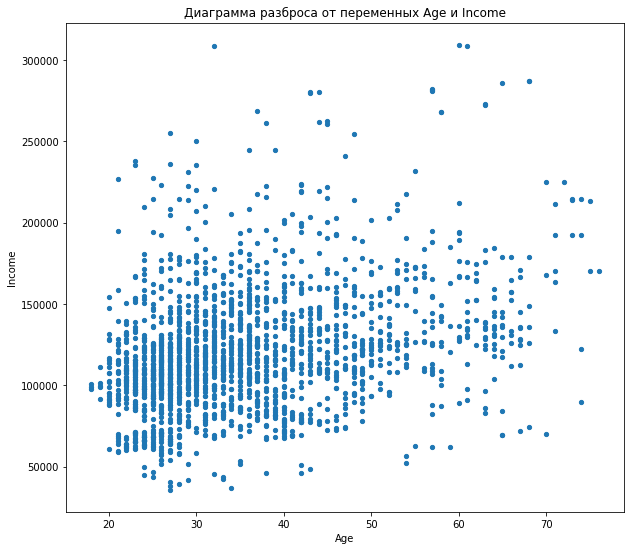

In [100]:
#1
plt.figure(figsize=(10, 9))
plt.scatter(df['Age'], df['Income'], s = 18)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Диаграмма разброса от переменных Age и Income")
plt.show()

# Из графика видно, что:
# 1)  Большую часть клиентов составляют люди до 50 лет
# 2)  Отсутсвует видимая зависимость между возрастом и доходом клиента

<Figure size 1080x648 with 0 Axes>

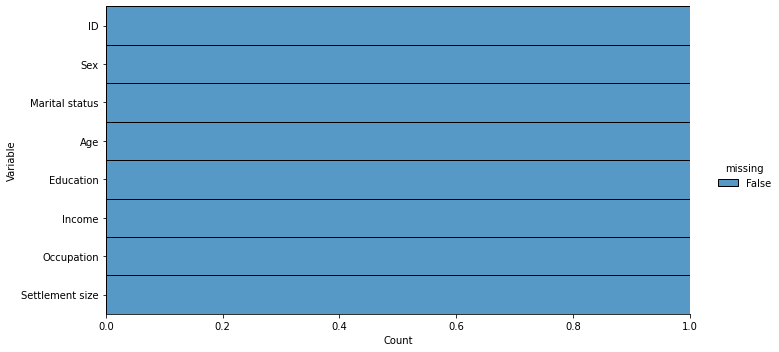

In [54]:
#2
plt.figure(figsize=(15,9))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.xlabel("Count")
plt.ylabel("Variable")
plt.show()

# Из графика следует, что пропущенные значения отсутствуют

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


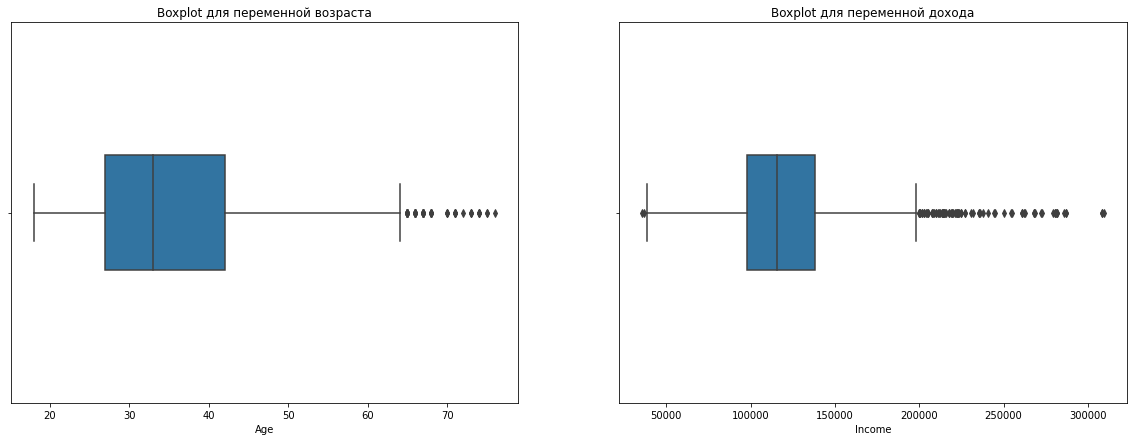

In [69]:
#3
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.boxplot(df['Age'], ax=ax[0], width=0.3)
sns.boxplot(df['Income'], ax=ax[1], width=0.3)

ax[0].set_title("Boxplot для переменной возраста")
ax[1].set_title("Boxplot для переменной дохода")

plt.show()

# Из диаграмм следует, что среди клиентов присутствуют выбивающиеся группы:
# 1) Пожилых людей старше 63-64 лет
# 2) Людей с доходом выше 200 000 
# 3) Людей с доходом ниже 30 000

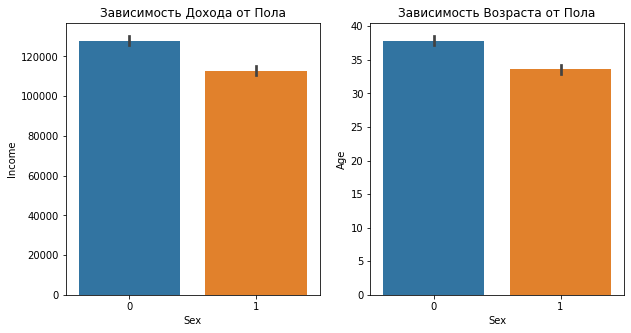

In [85]:
#4
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(data=df, ax=ax[0], x="Sex", y="Income")
sns.barplot(data=df, ax=ax[1], x="Sex", y="Age")

ax[0].set_title("Зависимость Дохода от Пола")
ax[1].set_title("Зависимость Возраста от Пола")
plt.show()

# Из графиков следует, что в среднем
# один из полов имеет бОльшие доходы,
# а представители этого пола среди клиентов
# в среднем старше

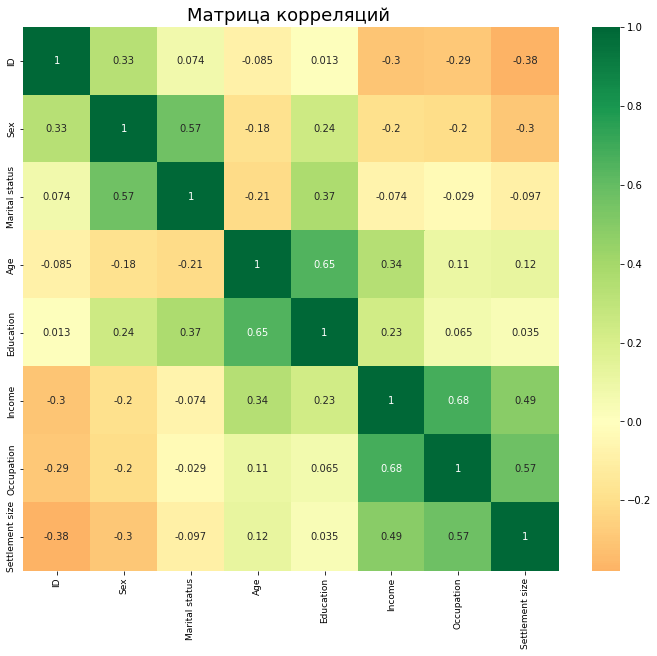

In [93]:
#5
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций ', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

# По матрице видно, что наибольшую зависимость между собой 
# имеют переменный Дохода и Профессии, Возраста и Образования,
# Пола и Семейного статуса;
# Наименьшую зависимость - ID и Settlement size, Settlement size и Пол,
# ID и Доход;

### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуета (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

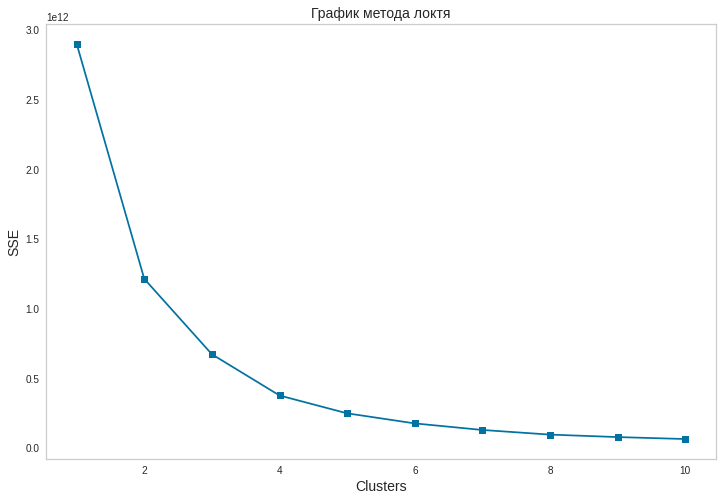

In [135]:
#1
# уберем ID из-за его низкой информативности 
dt = df.loc[:, ["Sex",	"Marital status",	"Age",	"Education",	"Income",	"Occupation",	"Settlement size"]]


SSE = []
plt.figure(figsize=(12, 8))
plt.grid()
plt.title("График метода локтя", fontsize = 14)
for i in range(1, 11):
  kmn = KMeans(i);
  kmn.fit(dt)
  SSE.append(kmn.inertia_)
plt.plot(range(1,11), SSE, marker="s")
plt.xlabel("Clusters", fontsize = 14)
plt.ylabel("SSE", fontsize = 14)
plt.show()

# Из графика до конца не ясно 
# оптимальное кол-во кластеров,
# но можно предположить,
# что оно находится между 3 и 5

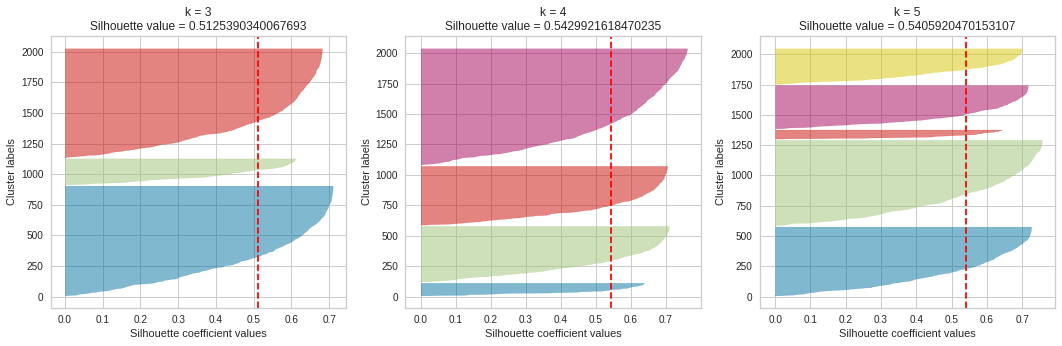

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in [3, 4, 5]:
    kmn = KMeans(i)
    kmn.fit(dt.values)
    ax[i-3].set_title(f"k = {i}\nSilhouette value = {silhouette_score(dt.values, kmn.predict(dt.values), metric='euclidean')}")
    ax[i-3].set_xlabel("Silhouette coefficient values")
    ax[i-3].set_ylabel("Cluster labels")
    visualizer = SilhouetteVisualizer(kmn, colors='yellowbrick', ax=ax[i-3])
    visualizer.fit(dt.values)

    # Из графиков и значений силуэтов 
    # можно сделать вывод, что
    # оптимальное кол-во кластеров - 3

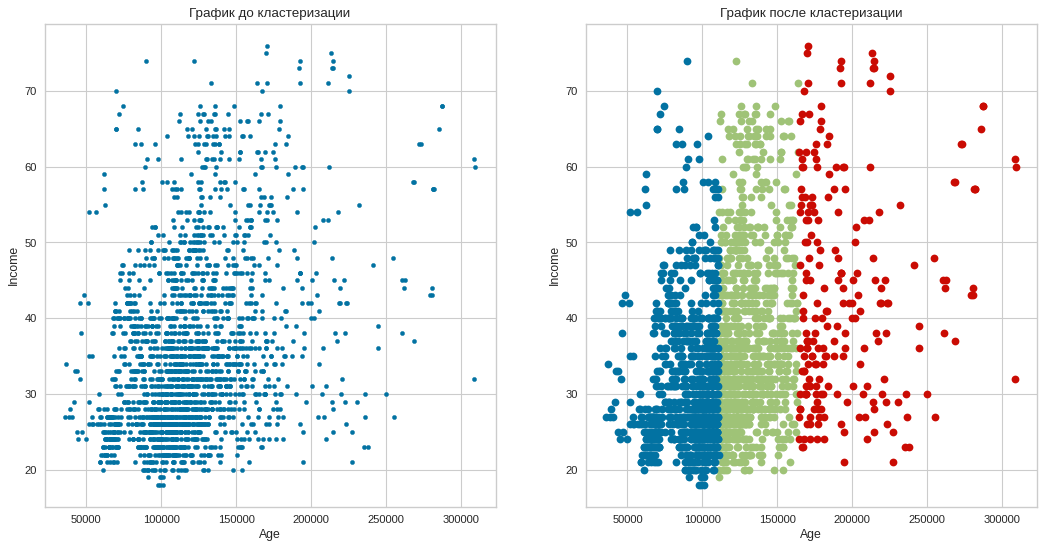

In [122]:
#2 
kmn = KMeans(3)
kmn.fit(df)
dfcl = pd.concat([df, pd.DataFrame(kmn.predict(df), columns = ["pred"])], axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=80)
ax[0].scatter(df['Income'], df['Age'], s=15)
ax[0].set_title("График до кластеризации")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Income")

ax[1].plot(dfcl[dfcl["pred"] == 0]['Income'], dfcl[dfcl["pred"] == 0]['Age'], 'go')
ax[1].plot(dfcl[dfcl["pred"] == 1]['Income'], dfcl[dfcl["pred"] == 1]['Age'], 'ro')
ax[1].plot(dfcl[dfcl["pred"] == 2]['Income'], dfcl[dfcl["pred"] == 2]['Age'], 'bo')
ax[1].set_title("График после кластеризации")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Income")

plt.show()

# По второму графику видно, 
# что разделение на кластеры
# произошло в большей степени
# по размерам доходов

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

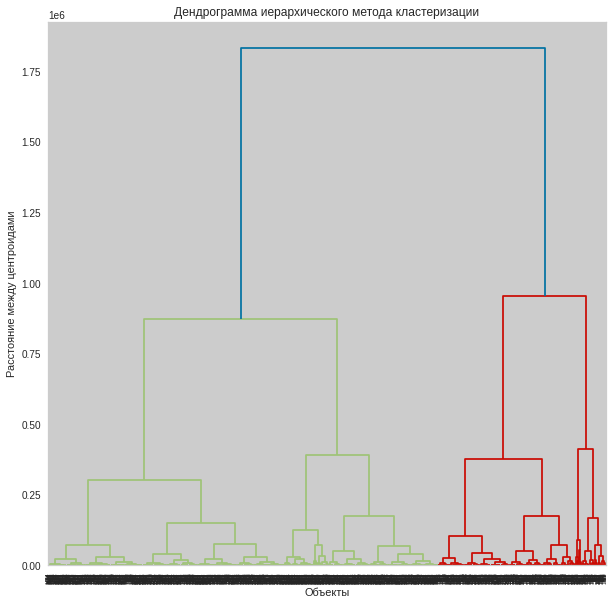

In [138]:
#1
Z = linkage(dt, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.title("Дендрограмма иерархического метода кластеризации")
plt.ylabel("Расстояние между центроидами")
plt.xlabel("Объекты")

plt.show()

# Из дендраграммы не ясно оптимальное
# кол-во кластеров, но ясно, что кластеров
# должно быть от 2 до 4

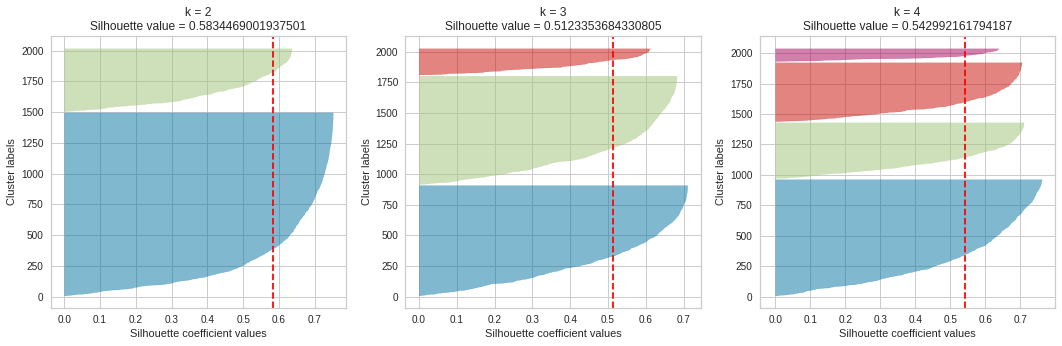

In [178]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in [2, 3, 4]:
    kmn = KMeans(i)
    kmn.fit(dt.values)
    ax[i-2].set_title(f"k = {i}\nSilhouette value = {silhouette_score(dt.values, kmn.predict(dt.values), metric='euclidean')}")
    ax[i-2].set_xlabel("Silhouette coefficient values")
    ax[i-2].set_ylabel("Cluster labels")
    visualizer = SilhouetteVisualizer(kmn, colors='yellowbrick', ax=ax[i-2])
    visualizer.fit(dt.values)

    # Из графиков и значений силуэтов 
    # можно сделать вывод, что
    # оптимальное кол-во кластеров - 3

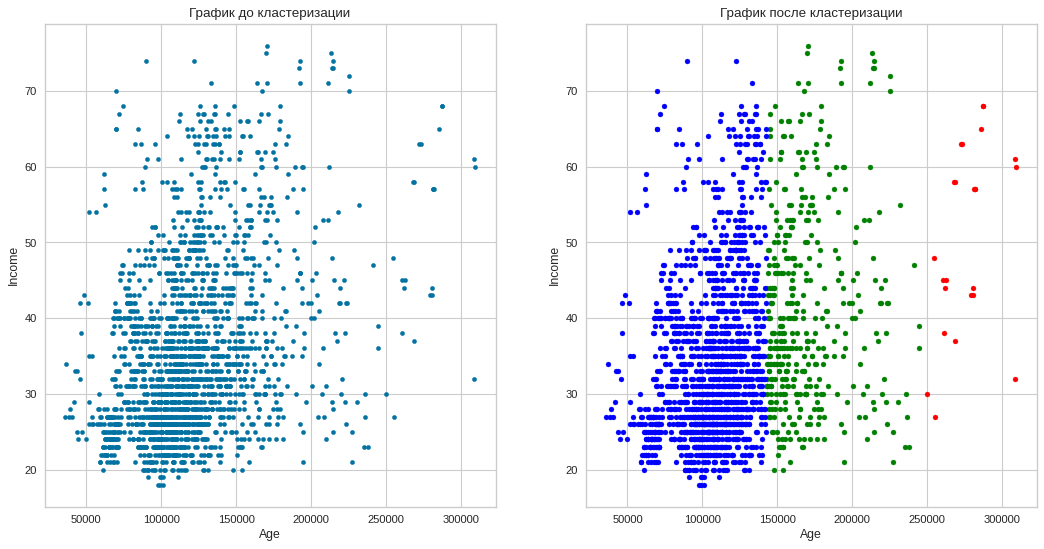

In [179]:
#2
label = fcluster(Z, 3, criterion='maxclust')
dt['pred'] = label

fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=80)
ax[0].scatter(dt['Income'], dt['Age'], s=15)
ax[0].set_title("График до кластеризации")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Income")

ax[1].scatter(dt.loc[label==3, 'Income'], dt.loc[label==3, 'Age'], s=20, marker='o', color='green')
ax[1].scatter(dt.loc[label==1, 'Income'], dt.loc[label==1, 'Age'], s=20, marker='o', color='red')
ax[1].scatter(dt.loc[label==2, 'Income'], dt.loc[label==2, 'Age'], s=20, marker='o', color='blue')
ax[1].set_title("График после кластеризации")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Income")

plt.show()

# По графикам видно, что как и в случае
# использования метода KMean разделение
# на кластеры происходит по величине доходов,
# однако в отличие от прошлого метода
# это разделение не столь равномерно